In [1]:
from stable_baselines3 import PPO
from settings import *
from wrappers import *
from game import Game
from stable_baselines3.common.env_checker import check_env
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import SubprocVecEnv, VecMonitor, DummyVecEnv
from evaluate import evaluate
    

In [ ]:
PPO.load("temp/ppo_pixels/ppo_pixels2023-02-04 03:47:46.872652.zip")


In [ ]:

options = GameOptions.from_yaml("configs/game_scenarios.yaml", "mid-barrier-no-proj")
rewards = RewardScheme.from_yaml("configs/rewards.yaml", "config-4")
options.rew = rewards.normalize(rewards.win_reward)
settings = GameWrapperSettings(normalize=False, flatten_action=True, skip_frames=8)

(100, 100, 1)
0 255


2023-02-03 10:13:22.863 Python[79907:13768196] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/3h/dn46yc0s22sd49xwgj_q60kh0000gn/T/com.apple.python3.savedState


step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in wrapper
step in 

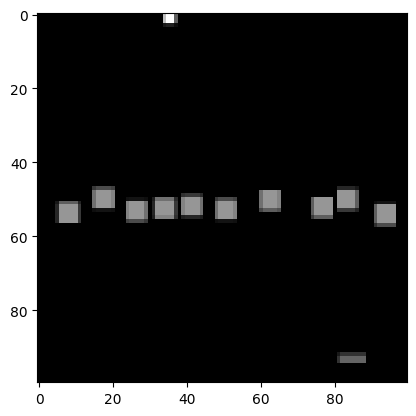

In [2]:


env = ImageWrapper(GameWrapper(Game(options=options, render_mode="rgb_array"), settings), factor=8)
obs, info = env.reset()
print(obs.shape)
print(obs.min(), obs.max())
plt.imshow(obs, cmap="gray")

# loop over env, doing random actions and displaying the observation and the last action
for i in range(501):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    # plt.imshow(obs)
    # plt.show()
    # plt.title("action: {}".format(action))
    # plt.pause(0.5)
    if done or truncated:
        print ("done in {} steps".format(i))
        obs, info = env.reset()

    

In [ ]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log="temp/ppo_pixels")
model.learn(total_timesteps=10_000_000, progress_bar=True)
env.close()